# <center>ПРИОРИТИЗАЦИЯ ГИПОТЕЗ И А/В-ТЕСТ </center>

В крупном интернет-магазины отдел аналитики и маркетинга подготовили списко гипотез для увеличения выручки. 

**Цель проекта - приоритизировать эти гипотезы, запустить А/В-тест, проанализировать результаты и принять решение.**

In [1]:
# Отключаем предупреждения 
import warnings
warnings.filterwarnings('ignore')

## <center> 1 ПРИОРИТИЗАЦИЯ ГИПОТЕЗ</center>

In [2]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Изучим таблицу с гипотезами.

In [3]:
pd.set_option('display.max_colwidth', -1)
ht.index += 1
ht.info()
ht

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 1 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
9,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
# убираем заглавную букву в названии столбцов
ht.columns = map(str.lower, ht.columns)

Применим фреймворк ICE для приоритизации гипотез и добавим значение в исходную таблицу.

In [5]:
ht['ICE'] = (ht['impact'] * ht['confidence']) / ht['efforts']
ht[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
9,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Применим фреймворк RICE для приоритизации гипотез  и добавим значение в исходную таблицу.

In [6]:
ht['RICE'] = (ht['reach'] * ht['impact'] * ht['confidence']) / ht['efforts']
ht[['hypothesis', 'RICE', 'ICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE,ICE
8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.200000
3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,7.000000
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.333333
7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,8.000000
9,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.200000
4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.125000
2,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.000000
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.333333
5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.000000


Заметим, что порядок приоритизации изменился, т.к. мы добавили в расчет параметр *reach* - охват аудитории, т.е. если мы учитываем количество пользователей, которые будут использовать новую функцию, то это меняет приоритет гипотез.

##      ВЫВОД

>Для фреймворка *ICE* приоритетные гипотезы - 9, 1, 8, а для фреймворка *RICE* - 8, 3, 1, 7, для него расчет ведется с учетом охвата аудитории.
>В обоих случаях приоритетны 8 и 1 гипотезы, для них по параметрам Reach и Impact соответственно имеем максимальные 10 баллов.

## <center> 2 АНАЛИЗ А/В - ТЕСТА </center>

Изучим таблицы с результатами А/В-теста.

In [7]:
# рассмотрим таблицу с заказами
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
# проверяем наличие дубликатов в таблице с заказами
orders.duplicated().sum() 

0

In [9]:
def check_dataset(dataset):
    try:
        print('\033[1m','Случайные 5 строк таблицы:','\033[0m')
        display(dataset.sample(n=5))
        print('\033[1m','Информация о типах данных:\n', '\033[0m')
        display(dataset.dtypes)
        print('\033[1m', 'Доля пропусков в столбцах:\n', '\033[0m')
        display(dataset.isnull().sum())
        print('\033[1m', '\nКоличество дубликатов:', '\033[0m') 
        display(dataset.duplicated().sum())
    except:
        print('Ошибка')
check_dataset(orders)

 Случайные 5 строк таблицы: 


,transactionId,visitorId,date,revenue,group
1041,3497987294,1212176445,2019-08-11,1780,A
1161,2961555325,325179089,2019-08-14,1100,B
479,1651227034,2927087541,2019-08-24,2190,B
288,3140010296,3647934575,2019-08-02,1990,B
1026,853409662,1390677121,2019-08-31,18557,B


 Информация о типах данных:
 


transactionId    int64 
visitorId        int64 
date             object
revenue          int64 
group            object
dtype: object

 Доля пропусков в столбцах:
 


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

 
Количество дубликатов: 


0

In [10]:
# рассмотрим таблицу с пользователями
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
# проверяем наличие дубликатов в таблице с пользователями
visitors.duplicated().sum() 

0

Данные не содержат пропусков и дубликатов, даты необходимо привести к нужному формату.

In [12]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

**2.1** Построим график кумулятивной выручки по группам.

In [13]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

Соберём агрегированные кумулятивные по дням данные о заказах.

In [14]:
# получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, 
# а группа теста равна группе из datesGroups

ordersAg = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина.

In [15]:
# получим строки таблицы visitors, дата которых меньше или равна дате элемента из datesGroups, 
# а группа теста равна группе из datesGroups

visitorsAg = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [16]:
# объединяем кумулятивные данные о заказах и посетителях в одной таблице, переименовываем столбцы

cumData = ordersAg.merge(
    visitorsAg, left_on=['date', 'group'], right_on=['date', 'group']
)

# задаем названия столбцам таблицы
cumData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [48]:
# импортируем библиотеку для построения графиков
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot
from plotly.graph_objs.scatter import Line

In [49]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumRevenueA = cumData[cumData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumRevenueB = cumData[cumData['group']=='B'][['date','revenue', 'orders']]

fig = go.Figure(layout_title_text='Кумулятивная выручка по дням в группах А и В')
# Строим график выручки группы А
fig.add_trace(go.Line(x=cumRevenueA['date'], y=cumRevenueA['revenue'], name='Группа А'))
# Строим график выручки группы B
fig.add_trace(go.Line(x=cumRevenueB['date'], y=cumRevenueB['revenue'], name='Группа В'))

# создаем подписи на графике
fig.update_layout(
                  legend_orientation="h",
                  yaxis=dict(title='Выручка'),
                  xaxis=dict(title='Дата', 
                            tickvals = cumRevenueA['date'])
                 )
fig.show()


Исследуем резкий рост выручки в группе В:
18 августа выручка равна примерно 2.7 млн, а 19 августа - уже 4.1 млн, за один день выручка выросла в 1,5 раза. Посмотрим, какие заказы были сделаны в группе В в этот день, вероятно есть какие-то аномально дорогие.

In [20]:
orders.query('(date == "2019-08-19") and (group == "B")').sort_values(by='revenue', ascending=False).head(5)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
527,1570513684,2837914161,2019-08-19,33405,B
461,2683113224,154576532,2019-08-19,26550,B
368,3268879337,2536252163,2019-08-19,20026,B
463,4170537404,290022471,2019-08-19,16480,B


Ожидания подтвердились: 19 августа в группе В был совершен заказ на сумму 1294500, который и дал такой резкий рост кумулятивной выручке.

>Выручка растет в течение всего теста, это хорошо.
>Отметили, что 19 августа в группе В была совершена покупка на сверх-большую сумму, что привело к резкому скачку кумулятивной выручки.

**2.2** Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.

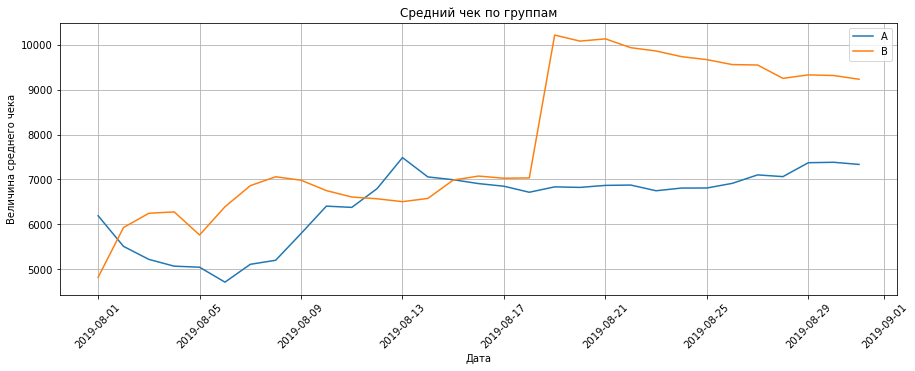

In [21]:
# задаем размер графика и размерную сетку
plt.rcParams["figure.figsize"] = (15,5)
plt.grid(True)

# строим графики среднего чека группы А
plt.plot(cumRevenueA['date'], cumRevenueA['revenue']/cumRevenueA['orders'], label='A')
# строим графики среднего чека группы В
plt.plot(cumRevenueB['date'], cumRevenueB['revenue']/cumRevenueB['orders'], label='B')

# создаем подписи на графике
plt.title('Средний чек по группам')
plt.ylabel('Величина среднего чека')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.legend()
plt.show()

>Показатели среднего чека стабилизируются ближе к концу теста, по-прежнему остается большой разрыв между значениями в пользу среднего чека группы В. 
>Как выяснили ранее, 19 августа в группе B была покупка на очень крупную сумму, этим и объясняется скачок среднего чека в этот день.

**2.3** Построим график относительного различия для среднего чека. Добавим на график горизонтальную ось методом axhline().

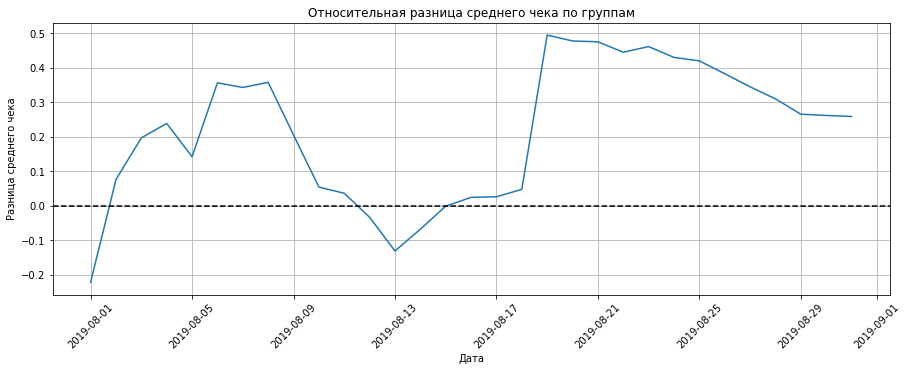

In [22]:
# собираем данные в одном датафрейме
mergedCumRevenue = cumRevenueA.merge(cumRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.rcParams["figure.figsize"] = (15,5)
plt.grid(True)
plt.plot(mergedCumRevenue['date'], (mergedCumRevenue['revenueB']/mergedCumRevenue['ordersB'])
         /(mergedCumRevenue['revenueA']/mergedCumRevenue['ordersA'])-1)

# создаем подписи на графике
plt.title('Относительная разница среднего чека по группам')
plt.ylabel('Разница среднего чека')
plt.xlabel('Дата')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=45)
plt.show()

>Отмечаем на графике несколько резких скачков и спадов. В основном кривая находится над нулевой линией, это значит, что почти на протяжении всего теста средний чек группы В больше среднего чека группы А. Вероятно причинами так же являются крупные заказы и выборосы.

**2.4** Построим график кумулятивной конверсии по группам

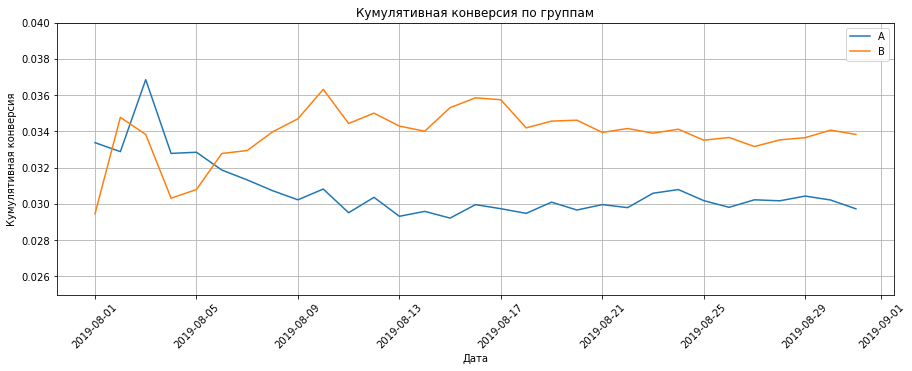

In [23]:
# считаем кумулятивную конверсию
cumData['conversion'] = cumData['orders']/cumData['visitors']

# выделяем данные по группе A
cumDataA = cumData[cumData['group']=='A']

# выделяем данные по группе B
cumDataB = cumData[cumData['group']=='B']

# строим графики
plt.rcParams["figure.figsize"] = (15,5)
plt.grid(True)
plt.plot(cumDataA['date'], cumDataA['conversion'], label='A')
plt.plot(cumDataB['date'], cumDataB['conversion'], label='B')
plt.legend()

# создаем подписи на графике
plt.title('Кумулятивная конверсия по группам')
plt.ylabel('Кумулятивная конверсия')
plt.xlabel('Дата')

# задаем масштаб осей
plt.ylim([0.025, 0.04]) 
plt.xticks(rotation=45)
plt.show()

>Сначала группы немного колебались, затем конверсия группы A вырвалась вперёд, но после пошла на спал и зафиксировалась, а конверсия группы >B сначала просела, потом пошла в рост и также зафиксировалась.

**2.5** Построим график относительного различия кумулятивных конверсий.

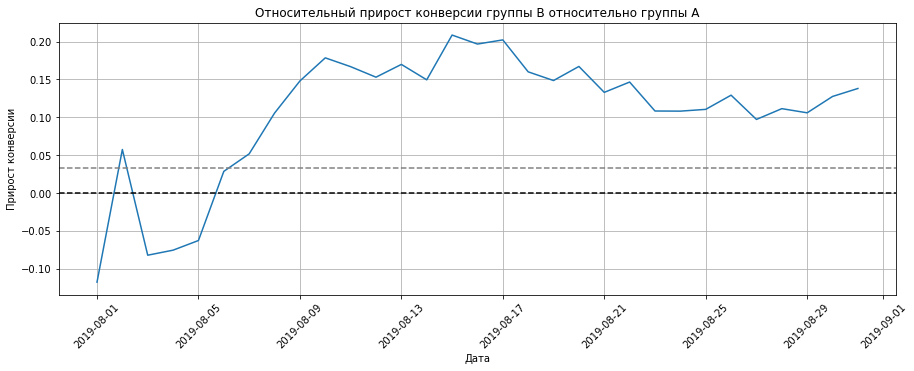

In [24]:
# объединяем данные по группам в одну таблицу по дате
mergedCumConversions = cumDataA[['date','conversion']].merge(
    cumDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# задаем размеры графика и размерную сетку
plt.rcParams["figure.figsize"] = (15,5)
plt.grid(True)

# строим графика относительного различия кумулятивных конверсий
plt.plot(mergedCumConversions['date'], 
         mergedCumConversions['conversionB']/mergedCumConversions['conversionA']-1
        )

# задаем название заголовка и осей
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.ylabel('Прирост конверсии')
plt.xlabel('Дата')

plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.033, color='grey', linestyle='--')
plt.show()

>В начале теста группа В значительно отставала от группы А, потом немного вырвалась вперед и снова обвалилась, но далее видим большой рост и становление. Практически на протяжении всего теста кумулятивная конверсия у группы В больше чем у группы А.

**2.6** Построим точечный график количества заказов по пользователям.

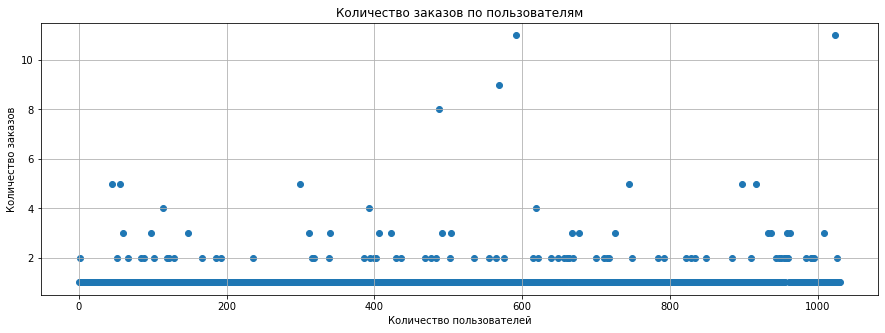

In [25]:
# считаем количество заказов по пользователям
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

# задаем названия столбцам таблицы
ordersByUsers.columns = ['visitorId', 'transaction']

# считаем количество пользователей
x_values = pd.Series(range(0,len(ordersByUsers)))

# задаем размер графика и размерную сетку
plt.rcParams["figure.figsize"] = (15,5)
plt.grid(True)

# строим график количества заказов по пользователям
plt.scatter(x_values, ordersByUsers['transaction'])

# задаем название заголовка и осей
plt.title('Количество заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.show()

>На графике видим много пользователей с 1-2 заказами. Мы не знаем их точное количество, поэтому рано говорить, аномалии это или нет.

**2.7** Для этого посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [26]:
# применим метод percentile()
np.percentile(ordersByUsers['transaction'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли 2 заказа. И не более 1% пользователей заказывали более 4 раз.
Выберем 2 заказа на одного пользователя за нижнюю границу числа заказов и отсеем аномальных пользователей по ней.

**2.8** Построим точечный график стоимостей заказов.

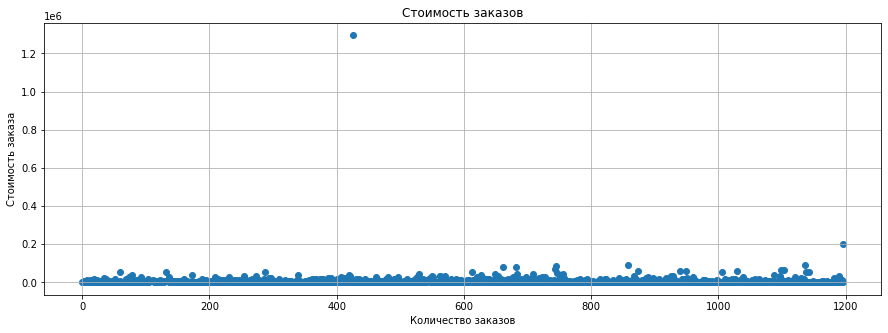

In [27]:
# оцениваем стоимость заказов
x_values = pd.Series(range(0,len(orders['revenue'])))

# задаем размер графика и размерную сеотку
plt.rcParams["figure.figsize"] = (15,5)
plt.grid(True)

# строим график стоимости заказов
plt.scatter(x_values, orders['revenue']) 

# задаем название заголовка и осей
plt.title('Стоимость заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Количество заказов')
plt.show()

>На графике видим наличие явных выбросов. Заказ на сумму более миллиона точно выглядит аномальным.

**2.9** Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [28]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более, чем 5% заказов дороже 28000 и не более чем 1% заказов дороже 58233.2. Ограничим стоимость заказов 28000, остальные будем считать аномальными.

**2.10** Вычислим статистическую значимость различий в конверсии между группами по "сырым" данным. Подготовим данные.
Считаем кумулятивные данные по пользователям в группах.

In [29]:
# считаем количество пользователей в группе А по датам
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# 
visitorsACum = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)

# задаем названия столбцам таблицы
visitorsACum.columns = ['date', 'visitorsCumA']

# считаем количество пользователей в группе В по датам
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#
visitorsBCum = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCum.columns = ['date', 'visitorsCumB']

Считаем кумулятивные данные по заказам в группах.

In [30]:
# считаем количество и стоимость заказов в группе А по датам
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)

# задаем названия столбцам таблицы
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# считаем кумулятивное количество пользователей и заказов в группе А
ordersACum = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

# задаем названия столбцам таблицы
ordersACum.columns = ['date','ordersCumA','revenueCumA']

In [31]:
# считаем количество и стоимость заказов в группе В по датам
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)

# задаем названия столбцам таблицы
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# считаем кумулятивное количество пользователей и заказов в группе В
ordersBCum = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

# задаем названия столбцам таблицы
ordersBCum.columns = ['date','ordersCumB','revenueCumB']

Объединим полученные вычисления в одной таблице.

In [32]:
# с помощью метода merge() соединяем все таблицы в одну по дате
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACum, left_on='date', right_on='date', how='left')
    .merge(ordersBCum, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACum, left_on='date', right_on='date', how='left')
    .merge(visitorsBCum, left_on='date', right_on='date', how='left')
)

Создадим переменные, в которых для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [33]:
# ищем пользователей, которые совершали заказ хотя бы один раз и считаем для них количество совершенных заказов
# для каждой группы отдельно создаем списки с количеством заказов для каждого пользователя
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

# задаем названия столбцам таблицы
ordersByUsersA.columns = ['visitorId', 'transaction']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

# задаем названия столбцам таблицы
ordersByUsersB.columns = ['visitorId', 'transaction']

Нам предстоит сравнение средних двух генеральных совокупностей.Выше было отмечено, что в данных присутствуют большие выбросы, далекие от нормальных значений, т.е. т-тест Стьюдента не подойдет, поэтому для проверки статистической значимости будем применять непараметрический метод Манна-Уитни, т.к. для него необязательно нормальное распределение данных. 

Подготовим полученные выборки к проверке. Создадим новые переменные, в которых пользователям из разных групп будет соответствовать количество заказов, а тем, кто ничего не заказал, будут соответствовать нули. 

In [34]:
# с помощью pd.concat() объединим по строкам последовательности для группы А, с помощью np.range() создали список индексов
selectA = pd.concat([ordersByUsersA['transaction'],pd.Series(
    0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction'])), name='transaction')],
                    axis=0)

In [35]:
# с помощью pd.concat() объединим по строкам последовательности для группы В, с помощью np.range() создали список индексов
selectB = pd.concat([ordersByUsersB['transaction'],pd.Series(
    0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction'])), name='transaction')],
                    axis=0)

*Нулевая гипотеза: "Между конверсиями групп А и В нет статистически значимой разницы".*


Применим критерий Манна-Уитни и отформатируем p-value, округлив его до пяти знаков после запятой, так же выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой.

In [36]:
print('P-value:', "{0:.5f}".format(stats.mannwhitneyu(selectA, selectB)[1]))

print('Относительный прирост конверсии группы В к конверсии группы А:', "{0:.3f}".format(
                        (data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())
                       /(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1)
                      ) 

P-value: 0.00840
Относительный прирост конверсии группы В к конверсии группы А: 0.138


**P-value значительно меньше 0.05, поэтому нулевую гипотезу отвергаем. По анализу "сырых" данных можно сделать вывод, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы В к конверсии группы А равен 13,8%.**

**2.11** 

*Нулевая гипотеза: "Между значениями среднего чека групп А и В нет статистически значимых различий"*

Вычислим статистическую значимость различий в среднем чеке заказа между группами по "сырым" данным. Для этого передадим критерию *mannwhitneyu()* данные о выручке с заказов, а так же найдём относительные различия в среднем чеке между группами.

In [37]:
print('P-value:', '{0:.3f}'.format(stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
     )
print('Относительное различие среднего чека группы В к среднему чеку группы А:', '{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)
     )

P-value: 0.365
Относительное различие среднего чека группы В к среднему чеку группы А: 0.259


**P-value больше 0.05, это значит, что статистически значимых различий в среднем чеке между группами нет. Но относительное различие среднего чека между сегментами 25,9%, это значит, что средний чек группы В значительно ниже среднего чека группы А.**

**2.12** Теперь посчитаем статистическую значимость различий в конверсии между группами на "очищенных" данных. Примем за аномальных пользователей тех, кто совершил 3 заказа и более, или совершил заказ на сумму свыше 28 000. Таким образом уберем от 1% до 5% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.

In [38]:
# определяем пользователей с количеством заказов больше двух
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transaction'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['transaction'] > 2]['visitorId'],
    ],
    axis=0,
)

# определеяем пользователей с суммой заказа больше 28000
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

# объединяем полученные данные, удаляем дубликаты и сортируем 
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head(5)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64

In [39]:
# вычислим количество аномальных пользователей
count_abnormal = abnormalUsers.shape[0]
count_abnormal

74

Нужно понять, много это или мало, посчитаем всех пользователей, используя метод count(), т.к. один и тот же пользователь за весь рассматриваемый период мог совершить как покупку подходящую под нормальное распределение, так и выходяющую за него. Для подсчета всех пользователей будем использовать информацию из таблицы с заказами.

In [40]:
# считаем долю аномальных пользователей
part_abnormalUsers = count_abnormal / orders['visitorId'].count() 
print('Доля аномальных пользователей:', '{0:.2%}'.format(part_abnormalUsers))

Доля аномальных пользователей: 6.18%


Количество аномальных пользователей всего 6.18%, это не очень много, поэтому отсекая выбросы, потеряем не слишком много данных.

**2.13** Вычислим статистическую значимость различия конверсии после удаления аномальных пользователей. Подготовим выборки количества заказов по пользователям по группам теста.

In [41]:
# создаем переменную, в которую сохраняем данные по группе А, исключая аномальные
selectACleared = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['transaction'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction'])
            ),
            name='transaction',
        ),
    ],
    axis=0,
)

In [42]:
# создаем переменную, в которую сохраняем данные по группе В, исключая аномальные
selectBCleared = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['transaction'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction'])
            ),
            name='transaction',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [43]:
# выводим p-value  для сравнения конверсий между очищенными данными по группам
print('P-value:', '{0:.5f}'.format(stats.mannwhitneyu(selectACleared, selectBCleared)[1]))
# выводим относительный прирост конверсии очищенных данных группы B
print('Относительный прирост конверсии группы В к конверсии группы А по "очищенным" данным:', '{0:.3f}'.format(
    selectBCleared.mean()/selectACleared.mean()-1
        )
     )

P-value: 0.00652
Относительный прирост конверсии группы В к конверсии группы А по "очищенным" данным: 0.173


**Так же как и при вычислений на "сырых" данных статистическая значимость достигнута (p-value значительно меньше 0.05). Сегмент В лучше сегмента А на 17.3%.**

**2.14** Вычислим статистическую значимость различий среднего чека заказа между группами по "очищенным" данным.

In [44]:
# выводим p-value для сравнения среднего чека по очищенным данным между группами
print(
    'P-value:', '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

# выводим относительный прирост среднего чека по очищенным данным группы В
print(
        'Относительное различие среднего чека группы В к среднему чеку группы А по "очищенным данным":', '{0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.369
Относительное различие среднего чека группы В к среднему чеку группы А по "очищенным данным": -0.020


**P-value значительно больше 0.05, как и для "сырых" данных значит, что статистически значимых различий в среднем чеке между группами нет. Относительное различие среднего чека между сегментами сместилось с сторону сегмента А,  он показывает себя лучше на 20% чем сегмент В, но считаем это различие случайным, т.к. она не имеет статистической значимости.**

## <center>3 ВЫВОД</center>

1. Применив фреймворк *ICE*, получили наиболее приоритетные гипотезы: 9, 1, 8; применив фреймворк *RICE*, наиболее приоритетными стали: 8, 3, 1, 7. Если нам важен охват аудитории, то необходимо придерживаться второй приоритизации. В любом случае гипотезы 1 и 8 должны оцениваться в первую очередь.


2. Проанализировав А/В-тест, сделали следующие выводы:


    - Есть статистически значимое различие по конверсии между группами как по "сырым" данным, так и после фильтрации аномалий.

    - Как по "сырым", так и по "очищенным" данным нет статистически значимого различия по среднему чеку между группами. Поэтому получившееся относительное различие между средними чеками групп А и В считаем случайным.

    - График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту или зафиксировались около среднего значения.

    - График различия среднего чека колеблется, благодяря этому мы исследовали аномалии.


  **Исходя из полученных результатов, следует остановить тест и признать его успешным, приняв группу В за лучший сегмент.**